In [6]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video
from IPython.display import Image
import matplotlib.cm as cm 
from scipy import stats
import cmath

<font size="5">**Punto 1**.</font>


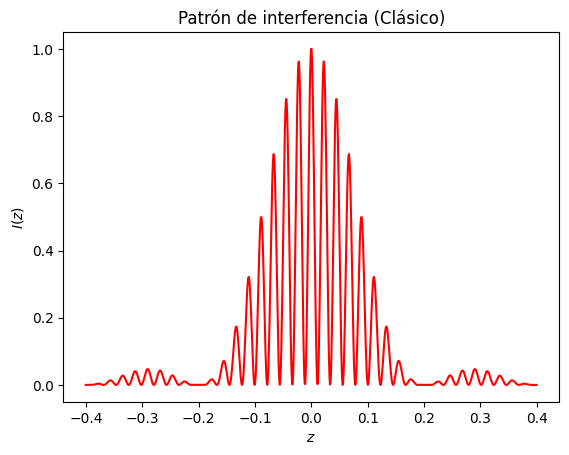

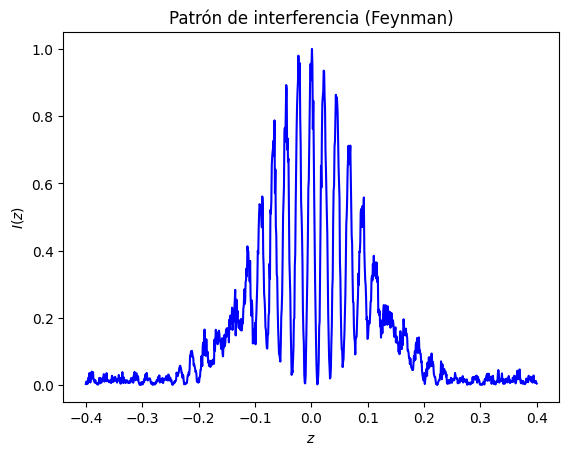

In [3]:
A = 0.1 #cm
long_onda = 670e-7 #cm
D1 = 30 #cm
D2 = 30 #cm
a = 0.01 #cm
d = 0.09 #cm
signo = np.array([-1,1])
N = 10000

def intensities_classical(z):
    theta = np.arctan2(z,D2)
    term1 = (np.cos((np.pi*d/long_onda)*np.sin(theta)))**2
    term2 = (np.sinc((a/long_onda)*np.sin(theta)))**2
    return term1*term2

def intensities_feynman(x,y,z):
    term1 = np.exp(2j * np.pi / long_onda * (D1 + D2))
    term2 = np.exp(np.pi * 1j / (long_onda * D1) * (x - y*np.random.choice(signo, N))**2)
    term3 = np.exp(np.pi * 1j / (long_onda * D1) * (z - y*np.random.choice(signo, N))**2)
    return np.mean(term1 * term2 * term3)

z = np.linspace(-0.4, 0.4, 1000)

p1 = np.zeros(len(z))
p2 = np.zeros(len(z))

for i in range(len(z)):
    x = np.random.uniform(-A/2, A/2, size=N)
    y = np.random.uniform(d/2-a/2, d/2+a/2, size=N)
    p1[i] = intensities_classical(z[i])
    p2[i] = np.absolute(intensities_feynman(x,y,z[i]))**2
    
p1 = p1/p1[np.argmax(p1)]
p2 = p2/p2[np.argmax(p2)]
plt.plot(z, p1, c="r")
plt.title("Patrón de interferencia (Clásico)")
plt.ylabel(r"$I(z)$")
plt.xlabel(r"$z$")
plt.show()
plt.plot(z, p2, c="b")
plt.title("Patrón de interferencia (Feynman)")
plt.ylabel(r"$I(z)$")
plt.xlabel(r"$z$")
plt.show()
#Falta el bono

Interpretar resultados #1

<font size="5">**Punto 2**.</font>

-0.01151973147431512 218 0.40347308443761143


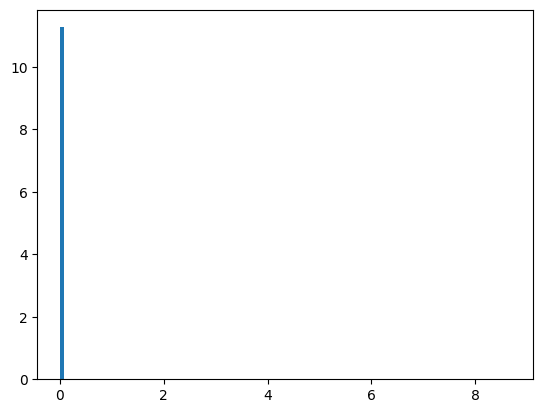

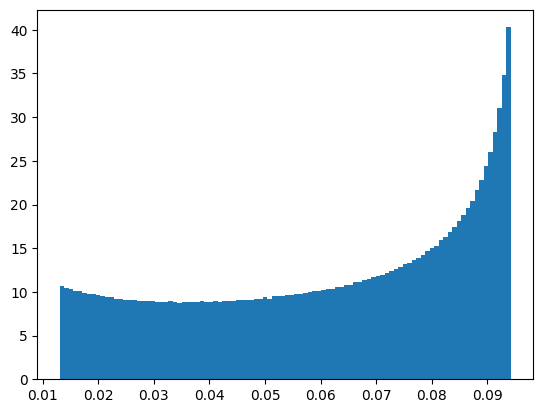

In [46]:
alpha = np.pi
beta = np.exp(1)
N = 10000

def dist(x):
    return np.exp((alpha- 1)*np.log((x)))*np.exp(-x/beta)

numeros = np.zeros(N)
x_sample = np.linspace(1,5, N)
x_0 = x_sample[0]
f_x0 = dist(x_0)
for i in range(N):
    nw_x = x_0 + np.random.normal(0,0.5)
    if nw_x <0:
        
        print(nw_x,i, x_0)
        break
    nw_f = dist(nw_x)
    aceptar = (nw_f/f_x0)
    if aceptar >= np.random.rand():
        numeros[i] = nw_x
        x_0 = nw_x
        f_x0 = nw_f
    else:
        numeros[i] = x_0
  
 
plt.hist(numeros, bins=100, density=True)

plt.show()
plt.hist(stats.gamma(alpha,scale=beta).pdf(x_sample), density=True, bins=100)
plt.show()
